# Skin Lesion Image Analysis

### Import all necessary dependancies 

In [1]:
%matplotlib inline
# python libraties
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

from glob import glob
from PIL import Image
from skimage.io import imread

C:\Users\RJame\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
print(os.listdir('../input/skin_analysis'))

['.ipynb_checkpoints', 'archive (10)', 'Untitled.ipynb']


In [3]:
print(os.listdir('../input/skin_analysis/archive (10)'))

['desktop.ini', 'HAM10000_images_part_1', 'HAM10000_images_part_2', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv']


### DataFrame Creation

In [4]:
# Load in necessary data to begin DataFrame construction for skin analysis
data_dir = '../input/skin_analysis/archive (10)'
all_image_path = glob(os.path.join(data_dir, '*', '*.jpg'))
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x for x in all_image_path}
lesion_type_dict = { # Store all skin leisons within a Pandas Dictionary
    'akiec': 'Actinic_keratoses',
    'bcc': 'Basal_cell_carcinoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic_nevi',
    'mel': 'Melanoma',
    'vasc': 'Vascular_lesions'
}

lesion_danger = {
    # '0' = Benign: 'Non-cancerous growths or masses of cells'
    # '1' = Malignant: 'Cancerous growths or masses of cells'
    'akiec': 1,
    'bcc': 1,
    'bkl': 0,
    'df': 0,
    'nv': 0, 
    'mel': 1,
    'vasc': 0
}

In [5]:
# Read in necessary data
skin_df = pd.read_csv(os.path.join(data_dir, 'HAM10000_metadata.csv'))

# Adding new columns to the DataFrame
# Map the 'image_id' path
skin_df ['path'] = skin_df['image_id'].map(imageid_path_dict.get)

# Map the 'dx' cell_type 
skin_df ['cell_type'] = skin_df['dx'].map(lesion_type_dict.get)
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes

# Print the newly constructed DataFrame
skin_df.head(10)

lesion_id      image_id   dx dx_type   age     sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear   
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear   
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face   
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face   
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back   
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back   

                                                path  \
0  ../input/skin_analysis/archive (10)\HAM10000_i...   
1  ../input/skin_analysis/archive (10)\HAM10000_i...   
2  ../input/skin_analysis/archive (10)\HAM10000_i...   
3  ../input/skin_analysis/archive (10)\HAM10000_i...   
4  ../input/skin_analysis/archive (10)\HAM10000_i...   
5  ../input/skin_analysis/archive (10)\HAM10000_i...   
6  ../input/skin_analysis/archive (10)\HAM10000_i...   
7  ../input/skin_analysis/archive (10)\HAM10000_i...   
8  ../input/skin_analysis/archive (10)\HAM10000_i...   
9  ../input/skin_analysis/archive (10)\HAM10000_i...   

                       cell_type  cell_type_idx  
0  Benign_keratosis-like_lesions              2  
1  Benign_keratosis-like_lesions              2  
2  Benign_keratosis-like_lesions              2  
3  Benign_keratosis-like_lesions              2  
4  Benign_keratosis-like_lesions              2  
5  Benign_keratosis-like_lesions              2  
6  Benign_keratosis-like_lesions              2  
7  Benign_keratosis-like_lesions              2  
8  Benign_keratosis-like_lesions              2  
9  Benign_keratosis-like_lesions              2

In [6]:
# Print 10 random samples
skin_df.sample(10)

lesion_id      image_id  dx    dx_type   age     sex     localization  \
4696  HAM_0003823  ISIC_0027081  nv  follow_up  50.0  female  lower extremity   
9014  HAM_0005750  ISIC_0030923  nv      histo  70.0    male  upper extremity   
6782  HAM_0004763  ISIC_0024891  nv      histo  55.0  female            scalp   
5147  HAM_0004771  ISIC_0024622  nv  follow_up  55.0    male            trunk   
7619  HAM_0007367  ISIC_0033658  nv      histo   5.0    male            trunk   
8657  HAM_0003652  ISIC_0032112  nv      histo  30.0    male            chest   
7574  HAM_0007483  ISIC_0032628  nv      histo  35.0  female             back   
8627  HAM_0003311  ISIC_0026452  nv      histo  55.0  female             back   
7046  HAM_0007249  ISIC_0028509  nv      histo  65.0  female             back   
4927  HAM_0002482  ISIC_0032064  nv  follow_up  40.0  female  lower extremity   

                                                   path         cell_type  \
4696  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
9014  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
6782  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
5147  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
7619  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
8657  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
7574  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
8627  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
7046  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   
4927  ../input/skin_analysis/archive (10)\HAM10000_i...  Melanocytic_nevi   

      cell_type_idx  
4696              4  
9014              4  
6782              4  
5147              4  
7619              4  
8657              4  
7574              4  
8627              4  
7046              4  
4927              4

### Image Creation

In [7]:
# Read in the Image array values
skin_df["image"] = skin_df["path"].map(imread)

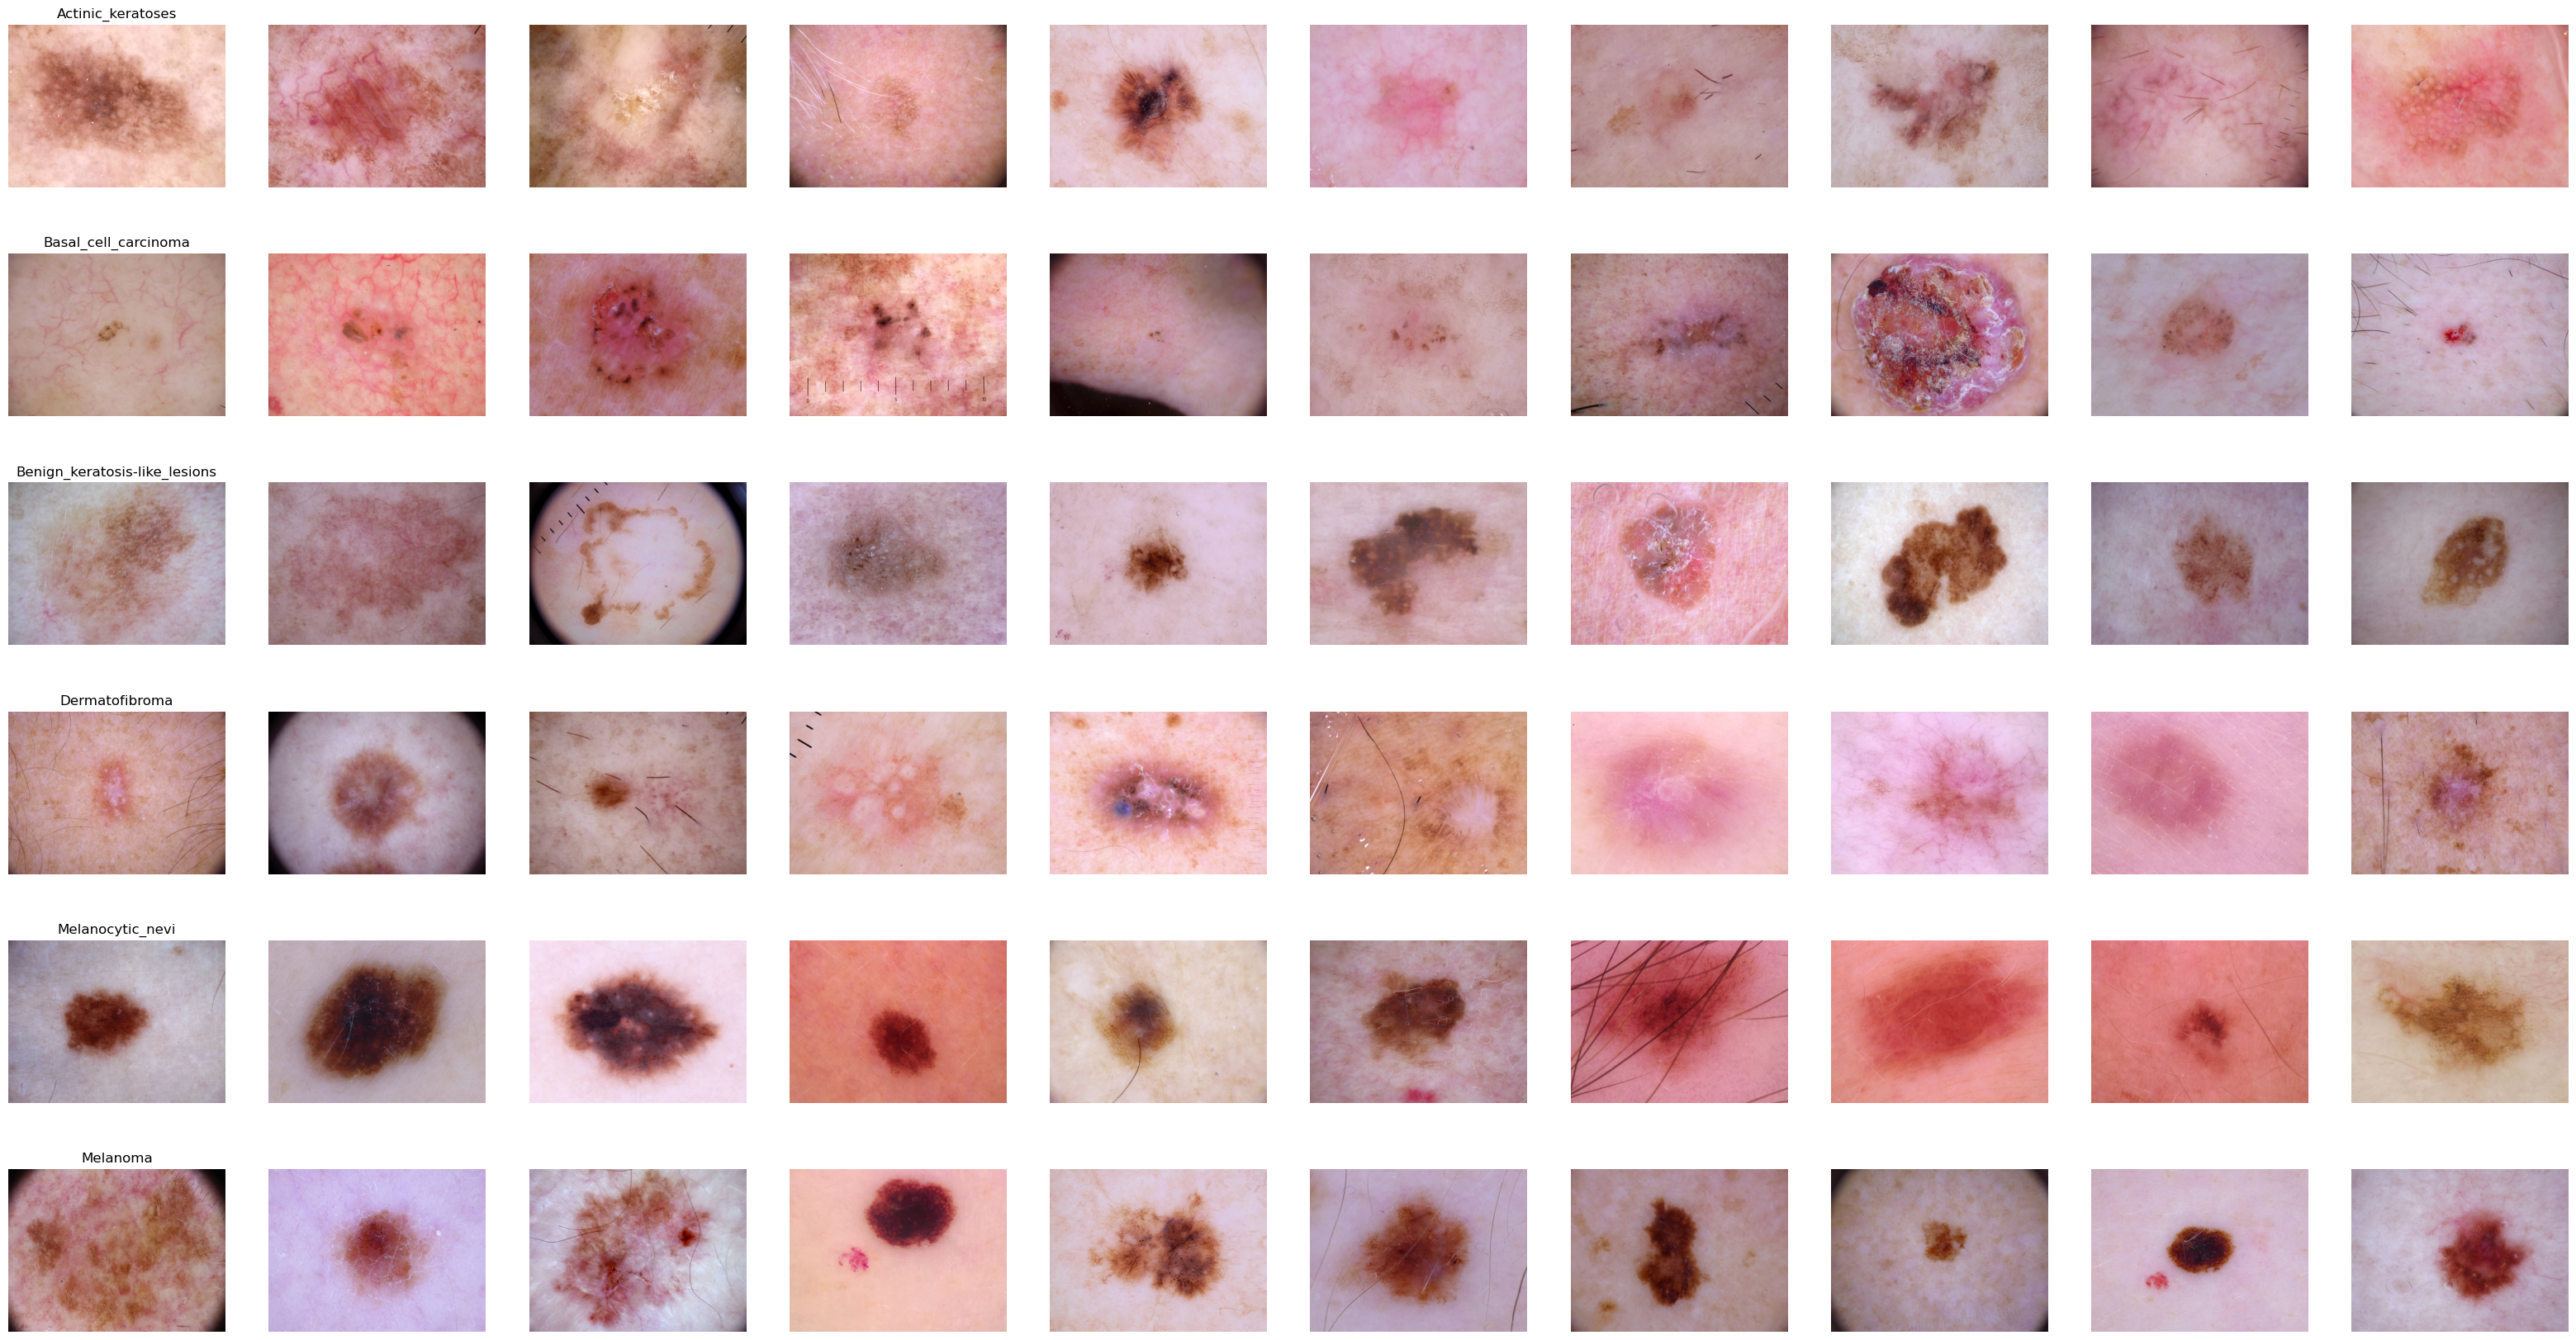

In [9]:
# Display cancerous images from the DataFrame

# Create a figure with subplots
n_samples =  10 # output 10 images per category
fig, m_axs = plt.subplots(6, n_samples, figsize=(4*n_samples, 3 * 7))

# Begin interation
for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(["cell_type"]).groupby("cell_type")):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=0).iterrows()): #'iterrows': allows for iteration through a Pandas DataFrame
        c_ax.imshow(c_row["image"])
        c_ax.axis("off")

# Save the figure
fig.savefig("rendered_image_combination.png", dpi=100)

# Display the combined image output
plt.show()